In [41]:
import Bio

import openpyxl
from Bio import SeqIO
import os,sys,re

import pandas as pd
print(pd.__name__, pd.__version__)

import numpy as np
print(np.__name__, np.__version__)

import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__name__, matplotlib.__version__)
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

import scipy.stats as stats
import scipy
print(scipy.__name__, scipy.__version__)

import seaborn as sns
print(sns.__name__, sns.__version__)

from collections import Counter

import scipy as sp
import math
from scipy.stats import shapiro 
from scipy.stats import lognorm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

pandas 1.5.2
numpy 1.23.5
matplotlib 3.7.2
scipy 1.10.0
seaborn 0.12.2


In [42]:
##Import df
df_del = pd.read_csv("deleterious_all_azoles_2023-07-11.csv")
df_dms = pd.read_csv("./select_coef_all_conditions_CB_2023-12-07.csv", header=0)
df_foldx = pd.read_csv("./foldx_CaERG11.csv", header=0)

df_foldx = df_foldx[df_foldx["Antifungal"]=="Itra"]

df_dms = df_dms[df_dms["aa"]!=df_dms["aa_WT"]].reset_index()

In [43]:
## create a new column called name

df_foldx['variant'] = df_foldx['position'].astype(str) + df_foldx['aa']
df_foldx['name'] = df_foldx['position'].astype(str) + df_foldx['aa'] + "_"+ df_foldx['Antifungal']
df_dms['name'] = df_dms['variant'] + "_"+ df_dms['Antifungal']

In [44]:
#list taken from the Catalog_Erg11_mutations_impact_CB_2023-12-06 notebook
del_control_only_list = ['105K', '106I', '134V', '140A', '140D', '140F', '140G', '140H', '140K', '140N', '140Q', '140R', 
                         '140S', '140Y', '143A', '143E', '143Q', '143S', '143T', '143V', '201P', '225A', '225G', '225Q', 
                         '225S', '230I', '276N', '276P', '298N', '298Q', '302S', '304G', '306F', '306Y', '314I', '374V', 
                         '376F', '405P', '405V', '405Y', '446P', '446R', '446Y', '447A', '447K', '447Q', '448K', '448R', 
                         '449R', '450R', '450S', '450Y', '452K', '461T', '471N', '509I', '509L', '511A', '511F', '511N', '511S']

# Use the isin() function to filter rows
del_control_only_df = df_foldx[df_foldx['variant'].isin(del_control_only_list)]
del_control_only_df

,position,wt,aa,ddGbind_lig,Antifungal,ddG,ddGbind_hem,variant,name
551,140,M,G,0.00000,Itra,3.40268,0.00572,140G,140G_Itra
976,225,D,G,0.15884,Itra,0.36337,0.03265,225G,225G_Itra
1370,304,I,G,0.00000,Itra,2.93028,0.02639,304G,304G_Itra
2964,140,M,A,0.00000,Itra,2.32913,-0.02039,140A,140A_Itra
2979,143,K,A,0.00000,Itra,-0.47251,-0.88095,143A,143A_Itra
...,...,...,...,...,...,...,...,...,...
45454,446,D,R,0.00000,Itra,1.27526,-0.04834,446R,446R_Itra
45464,448,G,R,0.00000,Itra,4.14753,-0.01927,448R,448R_Itra
45469,449,F,R,0.00000,Itra,7.94416,0.60979,449R,449R_Itra
45474,450,G,R,0.00000,Itra,3.44143,0.01123,450R,450R_Itra


In [45]:
del_control_only_df["ddG"].median()

2.32913

In [46]:
#group by antifungals

merged_df_group = df_dms.dropna().groupby("Antifungal")

df_none = merged_df_group.get_group("None").reset_index()
df_fluco = merged_df_group.get_group("Fluco").reset_index()
df_itra = merged_df_group.get_group("Itra").reset_index()
df_vorico = merged_df_group.get_group("Vorico").reset_index()
df_posaco = merged_df_group.get_group("Posaco").reset_index()

In [47]:
none_df_del = df_none[df_none["result"]=="Deleterious"]
none_df_del

,level_0,index,Unnamed: 0.1,Unnamed: 0,position,Antifungal,aa,select_coef,p_value,adjusted_p_value,variant,result,aa_WT,name
0,0,0,0,0,55,None,*,-0.528211,8.240903e-210,8.053801e-209,55*,Deleterious,I,55*_None
3,3,3,3,3,55,None,D,-0.057636,9.785407e-11,4.824697e-10,55D,Deleterious,I,55D_None
41,41,42,42,42,58,None,D,-0.130006,8.700307e-43,5.428482e-42,58D,Deleterious,F,58D_None
42,42,43,43,43,58,None,E,-0.058642,3.003058e-11,1.494119e-10,58E,Deleterious,F,58E_None
46,46,48,48,48,58,None,K,-0.034681,8.910441e-06,3.914667e-05,58K,Deleterious,F,58K_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,3811,4002,4002,4002,511,None,A,-0.032671,1.956748e-03,7.400098e-03,511A,Deleterious,L,511A_None
3815,3815,4006,4006,4006,511,None,F,-0.024764,9.777338e-04,3.831941e-03,511F,Deleterious,L,511F_None
3821,3821,4013,4013,4013,511,None,N,-0.025212,5.000708e-04,2.012365e-03,511N,Deleterious,L,511N_None
3825,3825,4017,4017,4017,511,None,S,-0.027139,1.626092e-03,6.210924e-03,511S,Deleterious,L,511S_None


In [48]:
##merge the dfs

#foldx data on the df with deleterious variants for all azoles
merged_df_del_all = df_del.merge(df_foldx, on='variant', how='inner', suffixes=('_dms', '_foldx'))



#foldx data on the df with deleterious variants in none
merged_df_del_none = none_df_del.merge(df_foldx, on='variant', how='inner', suffixes=('_dms', '_foldx'))

#all foldx data on dms data
merged_df = df_dms.merge(df_foldx, on='name', how='inner', suffixes=('_dms', '_foldx'))

#add a column 
merged_df_del_all['Deleterious without azoles'] = merged_df_del_all['variant'].isin(merged_df_del_none['variant'])

merged_df_del_all = pd.concat([merged_df_del_all, del_control_only_df], ignore_index=True)

merged_df_del_all['Deleterious without azoles'] = merged_df_del_all['Deleterious without azoles'].fillna('del control only')
merged_df_del_all.loc[merged_df_del_all['Deleterious without azoles'] == False, 'Deleterious without azoles'] = 'del azole only'
merged_df_del_all.loc[merged_df_del_all['Deleterious without azoles'] == True, 'Deleterious without azoles'] = 'del all'

In [49]:
merged_df_del_all

,Unnamed: 0,variant,s fluco,s itra,s vorico,s posaco,s isa,s clotri,position_dms,position_foldx,wt,aa,ddGbind_lig,Antifungal,ddG,ddGbind_hem,name,Deleterious without azoles,position
0,1.0,55D,-0.706814,-0.481650,-0.545815,-0.349018,-0.373303,-0.537737,55.0,55.0,I,D,-0.07693,Itra,1.38678,0.00000,55D_Itra,del all,NaN
1,2.0,55E,-0.610011,-0.393626,-0.432500,-0.351371,-0.363802,-0.407222,55.0,55.0,I,E,-0.10883,Itra,0.57731,0.00000,55E_Itra,del azole only,NaN
2,3.0,55H,-0.561415,-0.335860,-0.400190,-0.222416,-0.219221,-0.368161,55.0,55.0,I,H,0.00045,Itra,0.59022,0.00000,55H_Itra,del azole only,NaN
3,4.0,55K,-0.535107,-0.326617,-0.452815,-0.251856,-0.408495,-0.445417,55.0,55.0,I,K,0.03958,Itra,0.38984,0.00000,55K_Itra,del azole only,NaN
4,5.0,55N,-0.426395,-0.248775,-0.348678,-0.179852,-0.174113,-0.381746,55.0,55.0,I,N,0.00000,Itra,1.22242,0.00000,55N_Itra,del azole only,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,NaN,446R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,R,0.00000,Itra,1.27526,-0.04834,446R_Itra,del control only,446.0
2246,NaN,448R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,R,0.00000,Itra,4.14753,-0.01927,448R_Itra,del control only,448.0
2247,NaN,449R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,R,0.00000,Itra,7.94416,0.60979,449R_Itra,del control only,449.0
2248,NaN,450R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,R,0.00000,Itra,3.44143,0.01123,450R_Itra,del control only,450.0


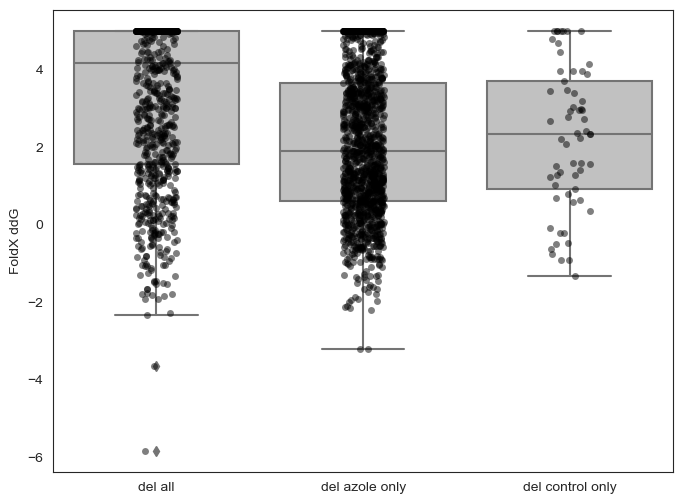

In [50]:
from scipy.stats import mannwhitneyu
sns.set_style("white")

# Assuming merged_df_del_all is your DataFrame
# Replace 'Deleterious without azoles', 'ddG', and 5 with the actual column names and threshold in your DataFrame

plt.figure(figsize=(8,6))

merged_df_del = merged_df_del_all
merged_df_del['ddG_5'] = np.where(merged_df_del['ddG'] > 5, 5, merged_df_del['ddG'])



# Create the boxplot
ax = sns.boxplot(x="Deleterious without azoles", y="ddG_5", color = "#C1C1C1",data=merged_df_del)

# Add points on the boxplot
sns.stripplot(x="Deleterious without azoles", y="ddG_5", data=merged_df_del,  color='black', jitter=True, alpha=0.5)

# Get medians and counts in the sorted order
medians = merged_df_del.groupby(['Deleterious without azoles'])["ddG_5"].median().values
nobs = merged_df_del.groupby(['Deleterious without azoles']).size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs]

plt.ylabel("FoldX ddG", fontsize=10)
plt.xlabel("", fontsize=12)  
# Add annotations
fixed_y = -5

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('correl_foldx_dms_caerg11_deleterious mut.svg', format='svg', dpi=300)
plt.savefig('correl_foldx_dms_caerg11_deleterious mut.png', format='png', dpi=300)

Mann-Whitney U test between del azole only and del all: p-value = 6.843699423129864e-48
Mann-Whitney U test between del azole only and del control only: p-value = 0.5147463362270572
Mann-Whitney U test between del all and del control only: p-value = 6.9021283760763075e-06


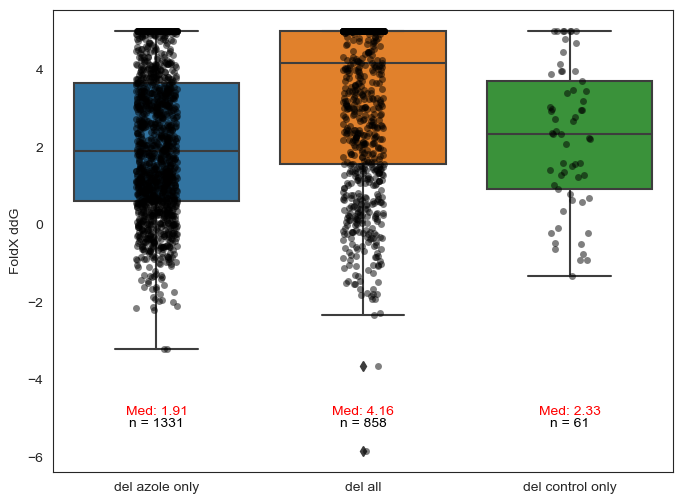

In [38]:
from scipy.stats import mannwhitneyu
sns.set_style("white")

# Assuming merged_df_del_all is your DataFrame
# Replace 'Deleterious without azoles', 'ddG', and 5 with the actual column names and threshold in your DataFrame

plt.figure(figsize=(8,6))

merged_df_del = merged_df_del_all
merged_df_del['ddG_5'] = np.where(merged_df_del['ddG'] > 5, 5, merged_df_del['ddG'])

# Get the order of categories based on counts
sorted_categories = merged_df_del['Deleterious without azoles'].value_counts().index

# Create a categorical variable with sorted categories
merged_df_del['Deleterious without azoles'] = pd.Categorical(merged_df_del['Deleterious without azoles'], categories=sorted_categories, ordered=True)

# Sort the DataFrame based on the order of categories
merged_df_del = merged_df_del.sort_values(by='Deleterious without azoles')

# Create the boxplot
ax = sns.boxplot(x="Deleterious without azoles", y="ddG_5", data=merged_df_del)

# Add points on the boxplot
sns.stripplot(x="Deleterious without azoles", y="ddG_5", data=merged_df_del,  color='black', jitter=True, alpha=0.5)

# Get medians and counts in the sorted order
medians = merged_df_del.groupby(['Deleterious without azoles'])["ddG"].median().values
nobs = merged_df_del.groupby(['Deleterious without azoles']).size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs]

plt.ylabel("FoldX ddG", fontsize=10)
plt.xlabel("", fontsize=12)  
# Add annotations
fixed_y = -5
for tick, category in enumerate(sorted_categories):
    ax.text(tick, fixed_y, nobs[tick], color='black', ha='center', va='top', fontsize=10)
    ax.text(tick, fixed_y, f'Med: {medians[tick]:.2f}', color='red', ha='center', va='bottom', fontsize=10)

# Statistical tests
for i in range(len(sorted_categories) - 1):
    for j in range(i + 1, len(sorted_categories)):
        category1 = sorted_categories[i]
        category2 = sorted_categories[j]
        
        group1 = merged_df_del[merged_df_del['Deleterious without azoles'] == category1]['ddG']
        group2 = merged_df_del[merged_df_del['Deleterious without azoles'] == category2]['ddG']
        
        _, p_value = mannwhitneyu(group1, group2)
        
        print(f"Mann-Whitney U test between {category1} and {category2}: p-value = {p_value}")

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('correl_foldx_dms_caerg11_deleterious mut.svg', format='svg', dpi=300)
plt.savefig('correl_foldx_dms_caerg11_deleterious mut.png', format='png', dpi=300)
